# Decisive Probability Distributions

In this activity, you’ll use the Alpaca API to gather pricing information for six stocks. Then, you’ll use this information to plot probability distributions for the daily returns of the stocks. Finally, you’ll determine the most and the least volatile stocks.
Instructions:

1. Create an environment file (`.env`) in the root of the `Unsolved` folder. This file will hold your Alpaca API and secret keys.

2. Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

3. Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

4. Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers:

    - `SPY` (SPDR S&P 500 ETF Trust)

    - `LUV` (Southwest Airlines)

    - `DIS` (Disney) 

    - `AAPL` (Apple)

    - `SBUX` (Starbucks)

    - `ZM` (Zoom)

> **Hint** Remember to set the tickers, time frame, start and end dates (‘2019-05-01’ and ‘2020-05-01’) and the number of rows returned. Then use the Alpaca `get_bars` function to make the API call. Be sure to set the `df` property at the end of the `get_bars` function so that the API response is returned as a DataFrame.

5. Create a new DataFrame that holds the closing prices of each stock.

6. Generate a daily returns DataFrame that’s based on the closing prices of each stock.

7. Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

> **Hint** Generate only two plots. Both the histogram and the density plot will show the data for all six stocks.


References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)

[Pandas Histogram plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

[Pandas Density plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html)

## Import the required libraries and dependencies

In [1]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
%matplotlib inline

## Step 1: Create your `.env` file at the root of your Unsolved folder. It should include your Alpaca API and secret keys. 

## Step 2: Load the Alpaca API and secret keys into `decisive_probability_distributions.ipynb`, and set the values equal to variables of the same name.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [3]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Check the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

## Step 3: Create the Alpaca API `REST` object by calling the Alpaca `tradeapi.REST` function and setting `alpaca_api_key`, `alpaca_secret_key`, and `api_version`.

In [5]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

## Step 4: Use the Alpaca SDK to make an API call that gets one year of daily stock information ( 2019-05-01 to 2020-05-01) for the following stock tickers: SPY, LUV, DIS, AAPL, SBUX, and ZM. 

* Create the list for the required `tickers`
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2019-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 

In [6]:
# Create the list for the required tickers
tickers = ['SPY', 'LUV', 'DIS', 'AAPL', 'SBUX', 'ZM']

In [12]:
# Set the values for start_date and end_date using the pd.Timestamp function
# The start and end data should be 2019-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 
start_date = pd.Timestamp('2022-11-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-11-24', tz='America/New_York').isoformat()


In [13]:
# Set timeframe to one day (1Day)
timeframe = '1Day'

In [14]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Review the first five rows of the resulting DataFrame 
display(prices_df.head())
display(prices_df.tail())

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2022-11-25 05:00:00+00:00,148.11,148.88,147.120,319573,148.305,38776713,148.164680,AAPL
2022-11-28 05:00:00+00:00,144.22,146.64,143.380,614361,145.140,78281391,144.726027,AAPL
2022-11-29 05:00:00+00:00,141.17,144.81,140.355,713286,144.290,89801206,142.010544,AAPL
2022-11-30 05:00:00+00:00,148.03,148.72,140.550,707655,141.395,131183862,145.545224,AAPL
2022-12-01 05:00:00+00:00,148.31,149.13,146.610,525991,148.210,78588359,148.124419,AAPL


,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-11-17 05:00:00+00:00,64.12,64.7600,63.5700,56338,64.43,4211128,64.074721,ZM
2023-11-20 05:00:00+00:00,66.00,66.0800,64.4800,123260,64.59,10986723,66.401840,ZM
2023-11-21 05:00:00+00:00,65.94,66.5499,61.8300,161612,63.66,13813788,64.825404,ZM
2023-11-22 05:00:00+00:00,63.83,66.5300,63.7699,75080,66.05,5099067,64.494592,ZM
2023-11-24 05:00:00+00:00,64.53,64.9800,63.8200,30780,64.03,1842335,64.342689,ZM


In [15]:
# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
LUV = prices_df[prices_df['symbol']=='LUV'].drop('symbol', axis=1)
DIS = prices_df[prices_df['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = prices_df[prices_df['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = prices_df[prices_df['symbol']=='SBUX'].drop('symbol', axis=1)
ZM = prices_df[prices_df['symbol']=='ZM'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, LUV, DIS, AAPL, SBUX, ZM], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "ZM"])

# Display sample data
prices_df.head()

SPY                                       \
                            close    high      low trade_count    open   
timestamp                                                                
2022-11-25 05:00:00+00:00  402.33  402.91  401.535      184647  401.83   
2022-11-28 05:00:00+00:00  395.91  400.81  395.110      441562  399.09   
2022-11-29 05:00:00+00:00  395.23  397.30  393.300      421324  396.05   
2022-11-30 05:00:00+00:00  407.68  407.68  393.480      814133  395.49   
2022-12-01 05:00:00+00:00  407.38  410.00  404.750      600444  408.77   

                                                    LUV                  ...  \
                              volume        vwap  close    high     low  ...   
timestamp                                                                ...   
2022-11-25 05:00:00+00:00   30545434  402.272977  39.22  39.575  38.565  ...   
2022-11-28 05:00:00+00:00   68021749  397.879662  38.57  39.140  38.465  ...   
2022-11-29 05:00:00+00:00   52310039  395.175765  39.25  39.380  38.630  ...   
2022-11-30 05:00:00+00:00  144566653  401.786807  39.91  39.935  38.815  ...   
2022-12-01 05:00:00+00:00   76398170  407.369627  40.08  40.200  39.710  ...   

                             SBUX                           ZM         \
                             open    volume        vwap  close   high   
timestamp                                                               
2022-11-25 05:00:00+00:00   99.64   2728270   99.374852  75.40  76.99   
2022-11-28 05:00:00+00:00   98.99   6228538   98.930534  71.59  76.50   
2022-11-29 05:00:00+00:00   98.96   5076744   98.618406  70.57  72.62   
2022-11-30 05:00:00+00:00   99.05  18628868  101.184557  75.43  75.44   
2022-12-01 05:00:00+00:00  102.33   8506675  102.987285  77.43  81.69   

                                                                           
                               low trade_count   open   volume       vwap  
timestamp                                                                  
2022-11-25 05:00:00+00:00  74.8300       35531  75.31  2797171  75.629264  
2022-11-28 05:00:00+00:00  71.3000       85068  74.72  7113712  72.583482  
2022-11-29 05:00:00+00:00  70.2900       69389  71.66  5205136  71.074651  
2022-11-30 05:00:00+00:00  69.5400       70952  70.76  7291476  73.240291  
2022-12-01 05:00:00+00:00  75.8575       72505  75.89  5120355  77.974602  

[5 rows x 42 columns]

## Step 5: Create a new DataFrame that holds the closing prices of each stock.

1. Create a `closing_prices_df` DataFrame.
2. Using a for-loop, for every `ticker` in the `tickers` list, select the `close` price for each ticker in the `prices_df` Dataframe. That expression will be set equal to  the new `closing_prices_df` for the same `ticker`.
3. For the new closing_prices_df DataFrame, keep only the date component (drop the time component).
4. View the `closing_prices_df` DataFrame. 

In [16]:
# Create an empty DataFrame for holding the closing prices
closing_prices_df = pd.DataFrame()

# Using a for loop, for every ticker in the tickers list, 
# Select the close price for each ticker in the prices_df Dataframe
# That will be set equal to closing_prices_df for the same ticker value
for ticker in tickers:
    closing_prices_df[ticker] = prices_df[ticker]['close']

# For the new closing_prices_df DataFrame, keep only the date component
closing_prices_df.index = closing_prices_df.index.date

# View the first and last five rows of the closing_prices_df DataFrame
display(closing_prices_df.head())
display(closing_prices_df.tail())

,SPY,LUV,DIS,AAPL,SBUX,ZM
2022-11-25,402.33,39.22,98.87,148.11,99.56,75.40
2022-11-28,395.91,38.57,95.69,144.22,98.66,71.59
2022-11-29,395.23,39.25,94.69,141.17,98.66,70.57
2022-11-30,407.68,39.91,97.87,148.03,102.20,75.43
2022-12-01,407.38,40.08,98.59,148.31,103.37,77.43


,SPY,LUV,DIS,AAPL,SBUX,ZM
2023-11-17,450.79,24.81,94.15,189.69,105.57,64.12
2023-11-20,454.26,25.13,95.03,191.45,104.30,66.00
2023-11-21,453.27,24.63,94.45,190.64,103.69,65.94
2023-11-22,455.02,24.71,95.07,191.31,103.44,63.83
2023-11-24,455.30,24.87,96.06,189.97,102.78,64.53


## Step 6: Generate a daily returns DataFrame that’s based on the closing prices of each stock.

In [17]:
# Compute daily returns of the closing_prices_df DataFrame using the pct_change function 
# Be sure to drop the first row of NaN values
daily_returns_df = closing_prices_df.pct_change().dropna()

# Review the first and last five rows of the daily_returns_df DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())


,SPY,LUV,DIS,AAPL,SBUX,ZM
2022-11-28,-0.015957,-0.016573,-0.032163,-0.026264,-0.009040,-0.050531
2022-11-29,-0.001718,0.017630,-0.010450,-0.021148,0.000000,-0.014248
2022-11-30,0.031501,0.016815,0.033583,0.048594,0.035881,0.068868
2022-12-01,-0.000736,0.004260,0.007357,0.001892,0.011448,0.026515
2022-12-02,-0.001154,-0.008234,0.008520,-0.003371,0.016252,-0.040294


,SPY,LUV,DIS,AAPL,SBUX,ZM
2023-11-17,0.001244,0.021408,-0.003809,-0.000105,-0.015297,0.011356
2023-11-20,0.007698,0.012898,0.009347,0.009278,-0.012030,0.029320
2023-11-21,-0.002179,-0.019897,-0.006103,-0.004231,-0.005849,-0.000909
2023-11-22,0.003861,0.003248,0.006564,0.003514,-0.002411,-0.031999
2023-11-24,0.000615,0.006475,0.010413,-0.007004,-0.006381,0.010967


## Step 7: Generate the summary statistics for the daily returns DataFrame. This provides your first review of the distribution information for your stocks.

In [18]:
# Using the Pandas describe function, generate summary statistics
# for each of the tickers in the daily_returns_df DataFrame
daily_returns_df.describe()

,SPY,LUV,DIS,AAPL,SBUX,ZM
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.000536,-0.001624,0.000041,0.001097,0.000231,-0.000329
std,0.009096,0.019760,0.017705,0.014211,0.014440,0.024272
min,-0.024462,-0.089355,-0.087305,-0.048020,-0.091735,-0.080661
25%,-0.005172,-0.012699,-0.008365,-0.007377,-0.007819,-0.013445
50%,0.000403,-0.000939,0.000256,0.001396,0.000049,-0.001478
75%,0.006548,0.012145,0.009749,0.009012,0.007275,0.015113
max,0.031501,0.052404,0.069112,0.048594,0.094800,0.098482


## Step 8. Visualize the distribution of the daily returns DataFrame by creating a histogram plot and a density plot.

<AxesSubplot:title={'center':'Daily Returns Histogram'}, ylabel='Frequency'>

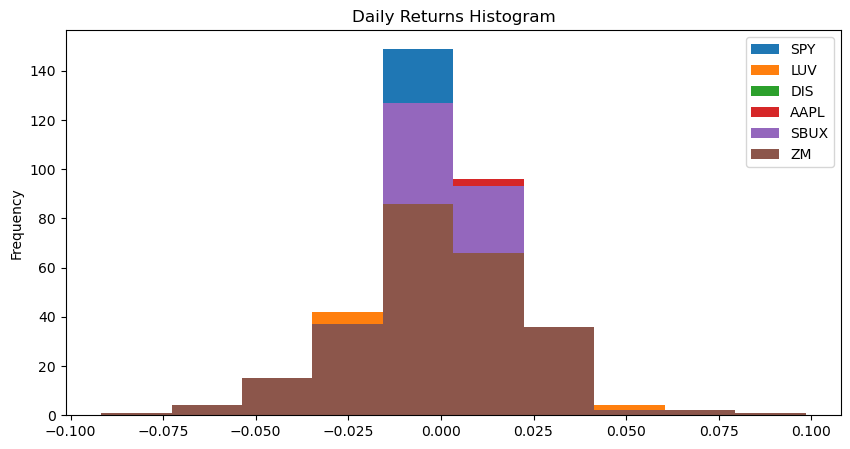

In [19]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Give the plot a title and adjust the figure size
daily_returns_df.plot.hist(
    figsize=(10,5),
    title='Daily Returns Histogram'
)

<AxesSubplot:title={'center':'Daily Returns Density Plot'}, ylabel='Density'>

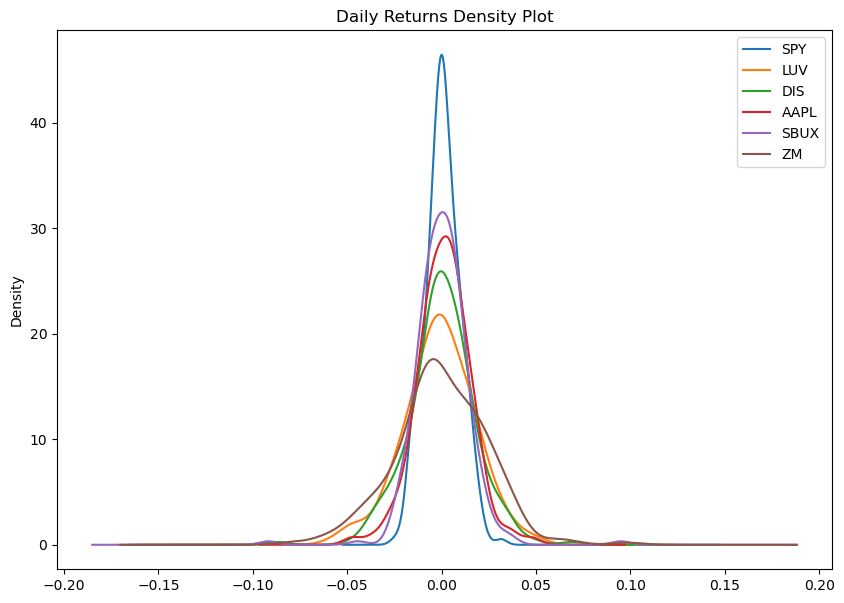

In [21]:
# Visualize the distribution of daily returns across all stocks using a density plot
# Give the plot a title and adjust the figure size
daily_returns_df.plot.density(
    figsize=(10,7),
    title='Daily Returns Density Plot'
)

## Reflect on the following question:

**Question:** After analyzing the summary statistics, histogram, and density plot for the SPY, LUV, DIS, AAPL, SBUX, and ZM stocks, which do you think is the most volatile stock based on the daily return data? Which is the least volatile?
    
**Answer:** # YOUR ANSWER HERE